In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

train = pd.read_parquet('/content/drive/MyDrive/DRW Crypto Market Prediction/train.parquet', engine='pyarrow')

# Identify target and feature columns
target_col = 'label'
market_cols = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']
feature_cols = [col for col in train.columns if col.startswith('X')]

# For technical indicators
def WMA(series, window):
    weights = np.arange(1, window + 1)
    return series.rolling(window).apply(lambda x: np.dot(x, weights)/weights.sum(), raw=True)

def HMA(series, window):
    half = int(window / 2)
    sqrt_win = int(np.sqrt(window))
    wma_half = WMA(series, half)
    wma_full = WMA(series, window)
    diff = 2 * wma_half - wma_full
    return WMA(diff, sqrt_win)

def RSI(series, period=14):
    delta = series.diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ma_up = up.rolling(period).mean()
    ma_down = down.rolling(period).mean()
    rs = ma_up / (ma_down + 1e-9)
    return 100 - (100 / (1 + rs))

def Bollinger_Bands(series, window=20, num_std=2):
    ma = series.rolling(window).mean()
    std = series.rolling(window).std()
    upper = ma + num_std * std
    lower = ma - num_std * std
    pos = (series - lower) / (upper - lower)
    return upper, lower, pos

def MACD(series, fast=12, slow=26, signal=9):
    ema_fast = series.ewm(span=fast, adjust=False).mean()
    ema_slow = series.ewm(span=slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

def momentum(series, period=10):
    return series - series.shift(period)

Mounted at /content/drive


In [3]:

# upload feature_hypothesis_table
from google.colab import files
uploaded = files.upload()

Saving feature_hypothesis_table.csv to feature_hypothesis_table.csv


In [4]:
# identify price-like features

# Load feature hypothesis table
feature_hypothesis = pd.read_csv('/content/feature_hypothesis_table.csv')

# Select price-like features based on hypothesis
price_like_features = feature_hypothesis[
    feature_hypothesis['hypothesis'].str.contains('price|volume', case=False, na=False)
]['feature'].tolist()

print("Price-like features:", price_like_features)

# Fibonacci windows
fib_windows = [55, 210, 340, 890, 3750]

Price-like features: ['X230', 'X231', 'X232', 'X234', 'X235', 'X236', 'X237', 'X238', 'X239', 'X240', 'X241', 'X242', 'X243', 'X244', 'X245', 'X246', 'X247', 'X481', 'X482', 'X483', 'X484', 'X485', 'X486', 'X487', 'X488', 'X489', 'X490', 'X491', 'X492', 'X493', 'X494', 'X514', 'X520', 'X526', 'X532', 'X541', 'X544', 'X595', 'X598', 'X601', 'X604', 'X744', 'X772', 'X773']


In [5]:
# Hull Moving Average Features

for feat in price_like_features:
    for win in fib_windows:
        colname = f"{feat}_hma_{win}"
        try:
            print(f"Creating {colname}...")
            train[colname] = HMA(train[feat], win)
        except Exception as e:
            print(f"Error creating {colname}: {e}")

Creating X230_hma_55...
Creating X230_hma_210...
Creating X230_hma_340...
Creating X230_hma_890...
Creating X230_hma_3750...
Creating X231_hma_55...
Creating X231_hma_210...
Creating X231_hma_340...
Creating X231_hma_890...
Creating X231_hma_3750...
Creating X232_hma_55...
Creating X232_hma_210...
Creating X232_hma_340...
Creating X232_hma_890...
Creating X232_hma_3750...
Creating X234_hma_55...
Creating X234_hma_210...
Creating X234_hma_340...
Creating X234_hma_890...
Creating X234_hma_3750...
Creating X235_hma_55...
Creating X235_hma_210...
Creating X235_hma_340...
Creating X235_hma_890...
Creating X235_hma_3750...
Creating X236_hma_55...
Creating X236_hma_210...
Creating X236_hma_340...
Creating X236_hma_890...
Creating X236_hma_3750...
Creating X237_hma_55...
Creating X237_hma_210...
Creating X237_hma_340...
Creating X237_hma_890...
Creating X237_hma_3750...
Creating X238_hma_55...
Creating X238_hma_210...
Creating X238_hma_340...
Creating X238_hma_890...
Creating X238_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X484_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X484_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X484_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X484_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X484_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X485_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X485_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X485_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X485_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X485_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X486_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X486_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X486_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X486_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X486_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X487_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X487_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X487_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X487_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X487_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X488_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X488_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X488_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X488_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X488_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X489_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X489_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X489_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X489_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X489_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X490_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X490_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X490_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X490_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X490_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X491_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X491_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X491_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X491_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X491_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X492_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X492_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X492_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X492_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X492_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X493_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X493_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X493_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X493_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X493_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X494_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X494_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X494_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X494_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X494_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X514_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X514_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X514_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X514_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X514_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X520_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X520_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X520_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X520_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X520_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X526_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X526_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X526_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X526_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X526_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X532_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X532_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X532_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X532_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X532_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X541_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X541_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X541_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X541_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X541_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X544_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X544_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X544_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X544_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X544_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X595_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X595_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X595_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X595_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X595_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X598_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X598_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X598_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X598_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X598_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X601_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X601_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X601_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X601_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X601_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X604_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X604_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X604_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X604_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X604_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X744_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X744_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X744_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X744_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X744_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X772_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X772_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X772_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X772_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X772_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X773_hma_55...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X773_hma_210...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X773_hma_340...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X773_hma_890...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


Creating X773_hma_3750...


/tmp/ipython-input-5-2937677218.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = HMA(train[feat], win)


In [6]:
# more technical indicators

# RSI
for feat in price_like_features:
    for period in [14, 21, 50]:
        colname = f"{feat}_rsi_{period}"
        try:
            print(f"Creating {colname}...")
            train[colname] = RSI(train[feat], period)
        except Exception as e:
            print(f"Error creating {colname}: {e}")

# Bollinger Bands
for feat in price_like_features:
    try:
        print(f"Creating Bollinger Bands for {feat}...")
        upper, lower, pos = Bollinger_Bands(train[feat], window=20)
        train[f"{feat}_bb_upper"] = upper
        train[f"{feat}_bb_lower"] = lower
        train[f"{feat}_bb_pos"] = pos
    except Exception as e:
        print(f"Error creating Bollinger Bands for {feat}: {e}")

# MACD
for feat in price_like_features:
    try:
        print(f"Creating MACD for {feat}...")
        macd, signal = MACD(train[feat])
        train[f"{feat}_macd"] = macd
        train[f"{feat}_macd_signal"] = signal
    except Exception as e:
        print(f"Error creating MACD for {feat}: {e}")

# Momentum
for feat in price_like_features:
    for period in [5, 10, 20]:
        colname = f"{feat}_momentum_{period}"
        try:
            print(f"Creating {colname}...")
            train[colname] = momentum(train[feat], period)
        except Exception as e:
            print(f"Error creating {colname}: {e}")

/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X230_rsi_14...
Creating X230_rsi_21...
Creating X230_rsi_50...
Creating X231_rsi_14...
Creating X231_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X231_rsi_50...
Creating X232_rsi_14...
Creating X232_rsi_21...
Creating X232_rsi_50...
Creating X234_rsi_14...
Creating X234_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X234_rsi_50...
Creating X235_rsi_14...
Creating X235_rsi_21...
Creating X235_rsi_50...
Creating X236_rsi_14...
Creating X236_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X236_rsi_50...
Creating X237_rsi_14...
Creating X237_rsi_21...
Creating X237_rsi_50...
Creating X238_rsi_14...
Creating X238_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X238_rsi_50...
Creating X239_rsi_14...
Creating X239_rsi_21...
Creating X239_rsi_50...
Creating X240_rsi_14...
Creating X240_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X240_rsi_50...
Creating X241_rsi_14...
Creating X241_rsi_21...
Creating X241_rsi_50...
Creating X242_rsi_14...
Creating X242_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X242_rsi_50...
Creating X243_rsi_14...
Creating X243_rsi_21...
Creating X243_rsi_50...
Creating X244_rsi_14...
Creating X244_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X244_rsi_50...
Creating X245_rsi_14...
Creating X245_rsi_21...
Creating X245_rsi_50...
Creating X246_rsi_14...
Creating X246_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X246_rsi_50...
Creating X247_rsi_14...
Creating X247_rsi_21...
Creating X247_rsi_50...
Creating X481_rsi_14...
Creating X481_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X481_rsi_50...
Creating X482_rsi_14...
Creating X482_rsi_21...
Creating X482_rsi_50...
Creating X483_rsi_14...
Creating X483_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X483_rsi_50...
Creating X484_rsi_14...
Creating X484_rsi_21...
Creating X484_rsi_50...
Creating X485_rsi_14...
Creating X485_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X485_rsi_50...
Creating X486_rsi_14...
Creating X486_rsi_21...
Creating X486_rsi_50...
Creating X487_rsi_14...
Creating X487_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X487_rsi_50...
Creating X488_rsi_14...
Creating X488_rsi_21...
Creating X488_rsi_50...
Creating X489_rsi_14...
Creating X489_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X489_rsi_50...
Creating X490_rsi_14...
Creating X490_rsi_21...
Creating X490_rsi_50...
Creating X491_rsi_14...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X491_rsi_21...
Creating X491_rsi_50...
Creating X492_rsi_14...
Creating X492_rsi_21...
Creating X492_rsi_50...
Creating X493_rsi_14...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X493_rsi_21...
Creating X493_rsi_50...
Creating X494_rsi_14...
Creating X494_rsi_21...
Creating X494_rsi_50...
Creating X514_rsi_14...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X514_rsi_21...
Creating X514_rsi_50...
Creating X520_rsi_14...
Creating X520_rsi_21...
Creating X520_rsi_50...
Creating X526_rsi_14...
Creating X526_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X526_rsi_50...
Creating X532_rsi_14...
Creating X532_rsi_21...
Creating X532_rsi_50...
Creating X541_rsi_14...
Creating X541_rsi_21...
Creating X541_rsi_50...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X544_rsi_14...
Creating X544_rsi_21...
Creating X544_rsi_50...
Creating X595_rsi_14...
Creating X595_rsi_21...
Creating X595_rsi_50...
Creating X598_rsi_14...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X598_rsi_21...
Creating X598_rsi_50...
Creating X601_rsi_14...
Creating X601_rsi_21...
Creating X601_rsi_50...
Creating X604_rsi_14...
Creating X604_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X604_rsi_50...
Creating X744_rsi_14...
Creating X744_rsi_21...
Creating X744_rsi_50...
Creating X772_rsi_14...
Creating X772_rsi_21...


/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = RSI(train[feat], period)
/tmp/ipython-input-6-3607456544.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fram

Creating X772_rsi_50...
Creating X773_rsi_14...
Creating X773_rsi_21...
Creating X773_rsi_50...
Creating Bollinger Bands for X230...
Creating Bollinger Bands for X231...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X232...
Creating Bollinger Bands for X234...
Creating Bollinger Bands for X235...
Creating Bollinger Bands for X236...
Creating Bollinger Bands for X237...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X238...
Creating Bollinger Bands for X239...
Creating Bollinger Bands for X240...
Creating Bollinger Bands for X241...
Creating Bollinger Bands for X242...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X243...
Creating Bollinger Bands for X244...
Creating Bollinger Bands for X245...
Creating Bollinger Bands for X246...
Creating Bollinger Bands for X247...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X481...
Creating Bollinger Bands for X482...
Creating Bollinger Bands for X483...
Creating Bollinger Bands for X484...
Creating Bollinger Bands for X485...
Creating Bollinger Bands for X486...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X487...
Creating Bollinger Bands for X488...
Creating Bollinger Bands for X489...
Creating Bollinger Bands for X490...
Creating Bollinger Bands for X491...
Creating Bollinger Bands for X492...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X493...
Creating Bollinger Bands for X494...
Creating Bollinger Bands for X514...
Creating Bollinger Bands for X520...
Creating Bollinger Bands for X526...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X532...
Creating Bollinger Bands for X541...
Creating Bollinger Bands for X544...
Creating Bollinger Bands for X595...
Creating Bollinger Bands for X598...
Creating Bollinger Bands for X601...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating Bollinger Bands for X604...
Creating Bollinger Bands for X744...
Creating Bollinger Bands for X772...
Creating Bollinger Bands for X773...


/tmp/ipython-input-6-3607456544.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_upper"] = upper
/tmp/ipython-input-6-3607456544.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_bb_lower"] = lower
/tmp/ipython-input-6-3607456544.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfr

Creating MACD for X230...
Creating MACD for X231...
Creating MACD for X232...
Creating MACD for X234...
Creating MACD for X235...
Creating MACD for X236...


/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd"] = macd
/tmp/ipython-input-6-3607456544.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd_signal"] = signal
/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

Creating MACD for X237...
Creating MACD for X238...
Creating MACD for X239...
Creating MACD for X240...
Creating MACD for X241...
Creating MACD for X242...


/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd"] = macd
/tmp/ipython-input-6-3607456544.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd_signal"] = signal
/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

Creating MACD for X243...
Creating MACD for X244...
Creating MACD for X245...
Creating MACD for X246...
Creating MACD for X247...
Creating MACD for X481...
Creating MACD for X482...


/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd"] = macd
/tmp/ipython-input-6-3607456544.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd_signal"] = signal
/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

Creating MACD for X483...
Creating MACD for X484...
Creating MACD for X485...
Creating MACD for X486...
Creating MACD for X487...
Creating MACD for X488...


/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd"] = macd
/tmp/ipython-input-6-3607456544.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd_signal"] = signal
/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

Creating MACD for X489...
Creating MACD for X490...
Creating MACD for X491...
Creating MACD for X492...
Creating MACD for X493...
Creating MACD for X494...
Creating MACD for X514...


/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd"] = macd
/tmp/ipython-input-6-3607456544.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd_signal"] = signal
/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

Creating MACD for X520...
Creating MACD for X526...
Creating MACD for X532...
Creating MACD for X541...
Creating MACD for X544...
Creating MACD for X595...


/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd"] = macd
/tmp/ipython-input-6-3607456544.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd_signal"] = signal
/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

Creating MACD for X598...
Creating MACD for X601...
Creating MACD for X604...
Creating MACD for X744...
Creating MACD for X772...
Creating MACD for X773...


/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd"] = macd
/tmp/ipython-input-6-3607456544.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[f"{feat}_macd_signal"] = signal
/tmp/ipython-input-6-3607456544.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfra

Creating X230_momentum_5...
Creating X230_momentum_10...
Creating X230_momentum_20...
Creating X231_momentum_5...
Creating X231_momentum_10...
Creating X231_momentum_20...
Creating X232_momentum_5...
Creating X232_momentum_10...
Creating X232_momentum_20...
Creating X234_momentum_5...
Creating X234_momentum_10...
Creating X234_momentum_20...
Creating X235_momentum_5...
Creating X235_momentum_10...
Creating X235_momentum_20...
Creating X236_momentum_5...
Creating X236_momentum_10...
Creating X236_momentum_20...
Creating X237_momentum_5...
Creating X237_momentum_10...
Creating X237_momentum_20...
Creating X238_momentum_5...
Creating X238_momentum_10...
Creating X238_momentum_20...
Creating X239_momentum_5...
Creating X239_momentum_10...
Creating X239_momentum_20...
Creating X240_momentum_5...


/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Creating X240_momentum_10...
Creating X240_momentum_20...
Creating X241_momentum_5...
Creating X241_momentum_10...
Creating X241_momentum_20...
Creating X242_momentum_5...
Creating X242_momentum_10...
Creating X242_momentum_20...
Creating X243_momentum_5...
Creating X243_momentum_10...
Creating X243_momentum_20...
Creating X244_momentum_5...
Creating X244_momentum_10...
Creating X244_momentum_20...
Creating X245_momentum_5...
Creating X245_momentum_10...
Creating X245_momentum_20...
Creating X246_momentum_5...
Creating X246_momentum_10...
Creating X246_momentum_20...
Creating X247_momentum_5...
Creating X247_momentum_10...
Creating X247_momentum_20...
Creating X481_momentum_5...
Creating X481_momentum_10...
Creating X481_momentum_20...
Creating X482_momentum_5...
Creating X482_momentum_10...
Creating X482_momentum_20...
Creating X483_momentum_5...


/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Creating X483_momentum_10...
Creating X483_momentum_20...
Creating X484_momentum_5...
Creating X484_momentum_10...
Creating X484_momentum_20...
Creating X485_momentum_5...
Creating X485_momentum_10...
Creating X485_momentum_20...
Creating X486_momentum_5...
Creating X486_momentum_10...
Creating X486_momentum_20...
Creating X487_momentum_5...
Creating X487_momentum_10...
Creating X487_momentum_20...
Creating X488_momentum_5...
Creating X488_momentum_10...
Creating X488_momentum_20...
Creating X489_momentum_5...
Creating X489_momentum_10...
Creating X489_momentum_20...
Creating X490_momentum_5...
Creating X490_momentum_10...
Creating X490_momentum_20...
Creating X491_momentum_5...
Creating X491_momentum_10...


/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Creating X491_momentum_20...
Creating X492_momentum_5...
Creating X492_momentum_10...
Creating X492_momentum_20...
Creating X493_momentum_5...
Creating X493_momentum_10...
Creating X493_momentum_20...
Creating X494_momentum_5...
Creating X494_momentum_10...
Creating X494_momentum_20...
Creating X514_momentum_5...
Creating X514_momentum_10...
Creating X514_momentum_20...
Creating X520_momentum_5...
Creating X520_momentum_10...
Creating X520_momentum_20...
Creating X526_momentum_5...
Creating X526_momentum_10...
Creating X526_momentum_20...
Creating X532_momentum_5...
Creating X532_momentum_10...
Creating X532_momentum_20...
Creating X541_momentum_5...
Creating X541_momentum_10...
Creating X541_momentum_20...
Creating X544_momentum_5...


/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

Creating X544_momentum_10...
Creating X544_momentum_20...
Creating X595_momentum_5...
Creating X595_momentum_10...
Creating X595_momentum_20...
Creating X598_momentum_5...
Creating X598_momentum_10...
Creating X598_momentum_20...
Creating X601_momentum_5...
Creating X601_momentum_10...
Creating X601_momentum_20...
Creating X604_momentum_5...
Creating X604_momentum_10...
Creating X604_momentum_20...
Creating X744_momentum_5...
Creating X744_momentum_10...
Creating X744_momentum_20...
Creating X772_momentum_5...
Creating X772_momentum_10...
Creating X772_momentum_20...
Creating X773_momentum_5...
Creating X773_momentum_10...
Creating X773_momentum_20...


/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = momentum(train[feat], period)
/tmp/ipython-input-6-3607456544.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

In [7]:
# dealing with missing values - Forward Fill with Limit (e.g., 10 periods)

fill_limit = 10
for col in train.columns:
    if train[col].isnull().any():
        train[col] = train[col].fillna(method='ffill', limit=fill_limit)
        # Optionally, fill remaining with backward fill or leave as is
        train[col] = train[col].fillna(method='bfill', limit=fill_limit)

/tmp/ipython-input-7-1900618666.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[col] = train[col].fillna(method='ffill', limit=fill_limit)
/tmp/ipython-input-7-1900618666.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[col] = train[col].fillna(method='bfill', limit=fill_limit)


In [8]:
# lag features & log returns for top correlated features

# Use your top correlated features (from previous analysis)
top_corr_features = ['X752', 'X21', 'X20']  # Replace with your actual list

for feat in top_corr_features:
    for lag in [1, 2, 3, 5, 10]:
        colname = f"{feat}_lag_{lag}"
        train[colname] = train[feat].shift(lag)
    # Log returns
    train[f"{feat}_logret"] = np.log(train[feat] / train[feat].shift(1)).replace([np.inf, -np.inf], np.nan)

/tmp/ipython-input-8-4022207777.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = train[feat].shift(lag)
/tmp/ipython-input-8-4022207777.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train[colname] = train[feat].shift(lag)
/tmp/ipython-input-8-4022207777.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

In [9]:
# Save full feature-engineered DataFrame
train.to_parquet('/content/drive/MyDrive/DRW Crypto Market Prediction/train_with_hma.parquet')
print("Saved to train_with_hma.parquet!")

Saved to train_with_hma.parquet!


In [ ]:
# managing memory

import gc
gc.collect()
print("Feature engineering complete. Data shape:", train.shape)

In [2]:
### MARKET REGIME DECTECTION

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


train = pd.read_parquet('/content/drive/MyDrive/DRW Crypto Market Prediction/train_with_hma.parquet')
print(f"Loaded data shape: {train.shape}")

def calculate_rolling_returns(data, windows=[20, 50, 100, 200]):
    """Calculate rolling returns over multiple windows for regime detection"""
    rolling_returns = {}

    for window in windows:
        # Use the first price-like feature as proxy for market returns
        price_col = 'X230'  # Assuming this is a price-like feature
        if price_col in data.columns:
            returns = data[price_col].pct_change()
            rolling_returns[f'rolling_ret_{window}'] = returns.rolling(window).mean()

    return pd.DataFrame(rolling_returns)

def classify_market_regime_crypto(data, windows=[20, 50, 100, 200]):
    """Classify market regime with crypto-appropriate thresholds"""
    rolling_rets = calculate_rolling_returns(data, windows)

    price_col = 'X230'
    if price_col in data.columns:
        returns = data[price_col].pct_change()
        rolling_vol = returns.rolling(50).std()
    else:
        rolling_vol = pd.Series(0, index=data.index)

    regime = pd.Series('STABLE', index=data.index)

    # Crypto-appropriate thresholds
    up_threshold = 0.01  # 1% positive return
    down_threshold = -0.01  # -1% negative return
    vol_threshold = 5.0  # 5% volatility threshold

    for window in windows:
        col = f'rolling_ret_{window}'
        if col in rolling_rets.columns:
            ret = rolling_rets[col]

            # UP regime: positive returns and moderate volatility
            up_mask = (ret > up_threshold) & (rolling_vol < vol_threshold)
            regime[up_mask] = 'UP'

            # DOWN regime: negative returns and moderate volatility
            down_mask = (ret < down_threshold) & (rolling_vol < vol_threshold)
            regime[down_mask] = 'DOWN'

            # HIGH_VOL regime: high volatility regardless of direction
            high_vol_mask = rolling_vol > vol_threshold
            regime[high_vol_mask] = 'HIGH_VOL'

    return regime, rolling_rets, rolling_vol

print("Market regime detection functions loaded!")

Mounted at /content/drive
Loaded data shape: (525886, 1508)
Market regime detection functions loaded!


In [3]:
# create regime-specific features

def create_regime_specific_features(data, regime, rolling_rets, rolling_vol):
    """Create regime-specific features"""
    features = {}

    # 1. Volatility clustering indicators
    features['vol_cluster_short'] = rolling_vol.rolling(10).std()
    features['vol_cluster_medium'] = rolling_vol.rolling(50).std()
    features['vol_cluster_long'] = rolling_vol.rolling(100).std()

    # 2. Trend strength measures
    for window in [20, 50, 100]:
        col = f'rolling_ret_{window}'
        if col in rolling_rets.columns:
            features[f'trend_strength_{window}'] = rolling_rets[col].abs()
            features[f'trend_direction_{window}'] = np.sign(rolling_rets[col])

    # 3. Market momentum indicators
    price_col = 'X230'
    if price_col in data.columns:
        returns = data[price_col].pct_change()
        features['momentum_5'] = returns.rolling(5).sum()
        features['momentum_10'] = returns.rolling(10).sum()
        features['momentum_20'] = returns.rolling(20).sum()
        features['momentum_50'] = returns.rolling(50).sum()

    # 4. Regime persistence
    regime_persistence = pd.Series(0, index=data.index)
    current_regime = regime.iloc[0]
    persistence_count = 0

    for i in range(len(regime)):
        if regime.iloc[i] == current_regime:
            persistence_count += 1
        else:
            current_regime = regime.iloc[i]
            persistence_count = 1
        regime_persistence.iloc[i] = persistence_count

    features['regime_persistence'] = regime_persistence

    return pd.DataFrame(features)

print("Regime-specific features function loaded!")

Regime-specific features function loaded!


In [4]:
# create cross-asset regime features

def create_cross_asset_regime_features(data, regime):
    """Create cross-asset regime features (market-wide indicators)"""
    features = {}

    # 1. Market-wide regime indicators
    # Use multiple price-like features to create market average
    price_like_features = ['X230', 'X231', 'X232', 'X234', 'X235', 'X236', 'X237', 'X238', 'X239', 'X240']
    available_features = [col for col in price_like_features if col in data.columns]

    if available_features:
        # Calculate market average returns
        market_returns = data[available_features].pct_change().mean(axis=1)

        # Market-wide momentum
        features['market_momentum_10'] = market_returns.rolling(10).sum()
        features['market_momentum_20'] = market_returns.rolling(20).sum()
        features['market_momentum_50'] = market_returns.rolling(50).sum()

        # Market-wide volatility
        features['market_volatility'] = market_returns.rolling(50).std()

        # Relative performance vs market
        for col in available_features[:5]:  # Use first 5 features
            asset_returns = data[col].pct_change()
            features[f'relative_perf_{col}'] = asset_returns - market_returns

    # 2. Correlation breakdown indicators
    if len(available_features) >= 3:
        # Calculate rolling correlation between assets
        corr_window = 50
        corr_breakdown = []

        for i in tqdm(range(corr_window, len(data)), desc="Calculating correlation breakdown"):
            window_data = data[available_features[:3]].iloc[i-corr_window:i]
            corr_matrix = window_data.corr()
            # Average correlation (excluding diagonal)
            avg_corr = (corr_matrix.sum().sum() - len(corr_matrix)) / (len(corr_matrix) * len(corr_matrix) - len(corr_matrix))
            corr_breakdown.append(avg_corr)

        # Pad with zeros for initial periods
        corr_breakdown = [0] * corr_window + corr_breakdown
        features['correlation_breakdown'] = pd.Series(corr_breakdown, index=data.index)

    return pd.DataFrame(features)

print("Cross-asset regime features function loaded!")

Cross-asset regime features function loaded!


In [5]:
# for regime transition

def create_regime_transition_features(regime):
    """Create regime transition features"""
    features = {}

    # 1. Regime change binary indicators
    regime_change = (regime != regime.shift(1)).astype(int)
    features['regime_change'] = regime_change

    # 2. Time since last regime change
    time_since_change = pd.Series(0, index=regime.index)
    last_change_idx = 0

    for i in range(1, len(regime)):
        if regime.iloc[i] != regime.iloc[i-1]:
            last_change_idx = i
        time_since_change.iloc[i] = i - last_change_idx

    features['time_since_regime_change'] = time_since_change

    # 3. Regime-specific binary indicators
    for regime_type in ['UP', 'DOWN', 'STABLE', 'HIGH_VOL']:
        features[f'is_{regime_type.lower()}'] = (regime == regime_type).astype(int)

    return pd.DataFrame(features)

def calculate_volatility_spike_indicators(data, rolling_vol):
    """Calculate volatility spike indicators"""
    features = {}

    # Volatility spike detection
    vol_mean = rolling_vol.rolling(100).mean()
    vol_std = rolling_vol.rolling(100).std()

    # Spike threshold: 2 standard deviations above mean
    spike_threshold = vol_mean + 2 * vol_std
    features['volatility_spike'] = (rolling_vol > spike_threshold).astype(int)

    # Volatility regime
    features['high_volatility'] = (rolling_vol > vol_mean + vol_std).astype(int)
    features['low_volatility'] = (rolling_vol < vol_mean - vol_std).astype(int)

    # Volatility trend
    features['volatility_trend'] = rolling_vol.rolling(20).mean() - rolling_vol.rolling(100).mean()

    return pd.DataFrame(features)

print("Regime transition and volatility spike functions loaded!")

Regime transition and volatility spike functions loaded!


In [6]:
# create regime labels for model splitting

def create_regime_labels_for_model_splitting(data, regime, rolling_rets):
    """Create regime labels for later model splitting"""
    labels = {}

    # 1. Bull market periods (>X% gains over Y periods)
    bull_threshold = 0.05  # 5% gain
    bear_threshold = -0.05  # 5% loss

    for window in [20, 50, 100]:
        col = f'rolling_ret_{window}'
        if col in rolling_rets.columns:
            ret = rolling_rets[col]

            # Bull market: sustained positive returns
            bull_mask = ret > bull_threshold
            labels[f'bull_market_{window}'] = bull_mask.astype(int)

            # Bear market: sustained negative returns
            bear_mask = ret < bear_threshold
            labels[f'bear_market_{window}'] = bear_mask.astype(int)

            # Stable market: small moves, low volatility
            stable_mask = (ret.abs() < 0.02) & (regime == 'STABLE')
            labels[f'stable_market_{window}'] = stable_mask.astype(int)

    return pd.DataFrame(labels)

print("Regime labels for model splitting function loaded!")

Regime labels for model splitting function loaded!


In [7]:
# main

print("Starting market regime detection...")

# 1. Market Regime Classification
print("1. Classifying market regimes...")
regime, rolling_rets, rolling_vol = classify_market_regime_crypto(train)

# 2. Regime-specific features
print("2. Creating regime-specific features...")
regime_features = create_regime_specific_features(train, regime, rolling_rets, rolling_vol)

# 3. Cross-asset regime features
print("3. Creating cross-asset regime features...")
cross_asset_features = create_cross_asset_regime_features(train, regime)

# 4. Regime transition features
print("4. Creating regime transition features...")
transition_features = create_regime_transition_features(regime)

# 5. Volatility spike indicators
print("5. Creating volatility spike indicators...")
vol_spike_features = calculate_volatility_spike_indicators(train, rolling_vol)

# 6. Regime labels for model splitting
print("6. Creating regime labels for model splitting...")
regime_labels = create_regime_labels_for_model_splitting(train, regime, rolling_rets)

# Combine all features
all_regime_features = pd.concat([
    regime_features,
    cross_asset_features,
    transition_features,
    vol_spike_features,
    regime_labels
], axis=1)

# Add regime classification as a feature
all_regime_features['market_regime'] = regime

print(f"Market regime features created: {all_regime_features.shape[1]} features")

Starting market regime detection...
1. Classifying market regimes...
2. Creating regime-specific features...
3. Creating cross-asset regime features...


Calculating correlation breakdown: 100%|██████████| 525836/525836 [19:08<00:00, 457.77it/s]


4. Creating regime transition features...
5. Creating volatility spike indicators...
6. Creating regime labels for model splitting...
Market regime features created: 44 features


In [8]:
# Save full feature-engineered DataFrame
train.to_parquet('/content/drive/MyDrive/DRW Crypto Market Prediction/train_with_features.parquet')
print("Saved to train_with_features.parquet!")

Saved to train_with_features.parquet!


In [9]:
# Check what variables exist
print("=== VARIABLE CHECK ===")
print(f"Regime variable exists: {'regime' in dir()}")
print(f"Rolling_rets variable exists: {'rolling_rets' in dir()}")
print(f"Rolling_vol variable exists: {'rolling_vol' in dir()}")
print(f"All_regime_features variable exists: {'all_regime_features' in dir()}")

# Check for any errors
print("\n=== ERROR CHECK ===")
try:
    print(f"Regime shape: {regime.shape}")
except NameError:
    print("Regime variable doesn't exist - cell didn't complete")

try:
    print(f"All_regime_features shape: {all_regime_features.shape}")
except NameError:
    print("All_regime_features variable doesn't exist - cell didn't complete")


# Check if all required functions exist
print("=== FUNCTION CHECK ===")
functions_needed = [
    'classify_market_regime_crypto',
    'create_regime_specific_features',
    'create_cross_asset_regime_features',
    'create_regime_transition_features',
    'calculate_volatility_spike_indicators',
    'create_regime_labels_for_model_splitting'
]

for func in functions_needed:
    exists = func in dir()
    print(f"{func}: {'✅' if exists else '❌'}")

# Check if calculate_rolling_returns exists
print(f"calculate_rolling_returns: {'✅' if 'calculate_rolling_returns' in dir() else '❌'}")

=== VARIABLE CHECK ===
Regime variable exists: True
Rolling_rets variable exists: True
Rolling_vol variable exists: True
All_regime_features variable exists: True

=== ERROR CHECK ===
Regime shape: (525886,)
All_regime_features shape: (525886, 44)
=== FUNCTION CHECK ===
classify_market_regime_crypto: ✅
create_regime_specific_features: ✅
create_cross_asset_regime_features: ✅
create_regime_transition_features: ✅
calculate_volatility_spike_indicators: ✅
create_regime_labels_for_model_splitting: ✅
calculate_rolling_returns: ✅


In [10]:
# add regime features to dataset

import pandas as pd
import numpy as np

# Load the dataset
train = pd.concat([train, all_regime_features], axis=1)

print(f"Updated dataset shape: {train.shape}")
print(f"New features added: {all_regime_features.shape[1]}")

# Display some regime statistics
print("\nRegime distribution:")
print(regime.value_counts())

print("\nSample regime features:")
print(all_regime_features.columns.tolist()[:20])

Updated dataset shape: (525886, 1552)
New features added: 44

Regime distribution:
UP          288489
DOWN        197381
HIGH_VOL     31887
STABLE        8129
Name: count, dtype: int64

Sample regime features:
['vol_cluster_short', 'vol_cluster_medium', 'vol_cluster_long', 'trend_strength_20', 'trend_direction_20', 'trend_strength_50', 'trend_direction_50', 'trend_strength_100', 'trend_direction_100', 'momentum_5', 'momentum_10', 'momentum_20', 'momentum_50', 'regime_persistence', 'market_momentum_10', 'market_momentum_20', 'market_momentum_50', 'market_volatility', 'relative_perf_X230', 'relative_perf_X231']


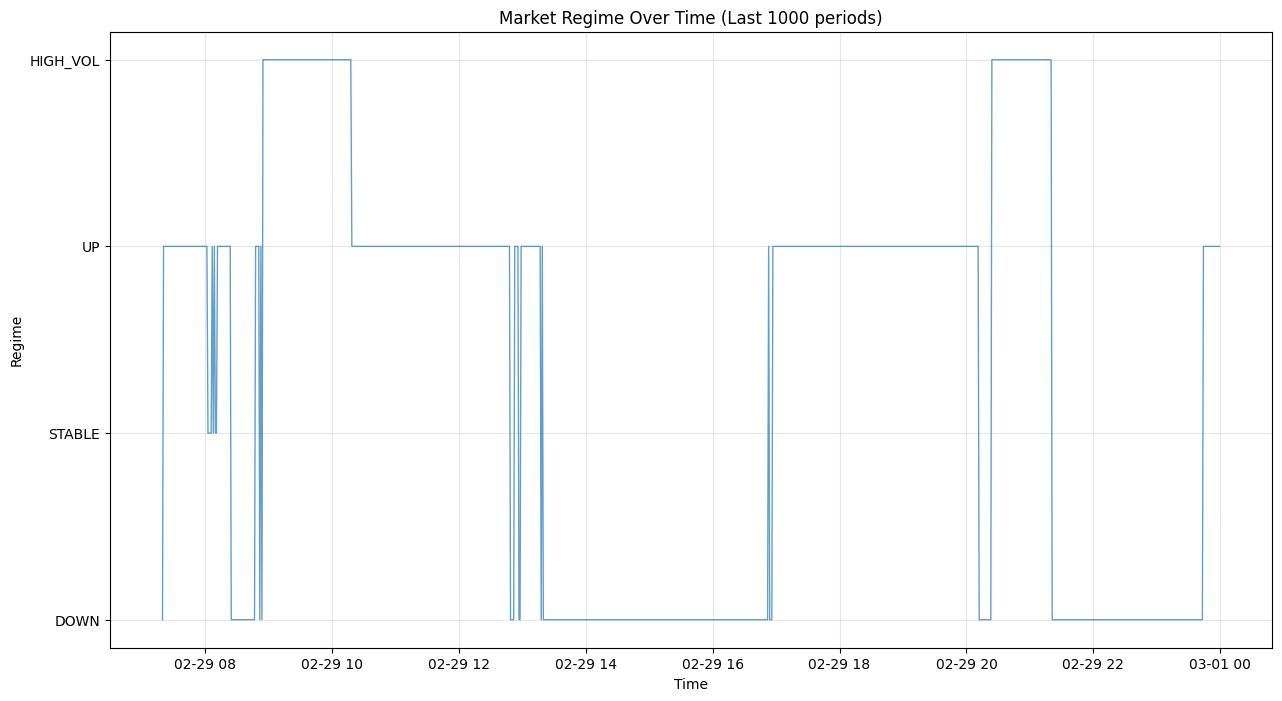

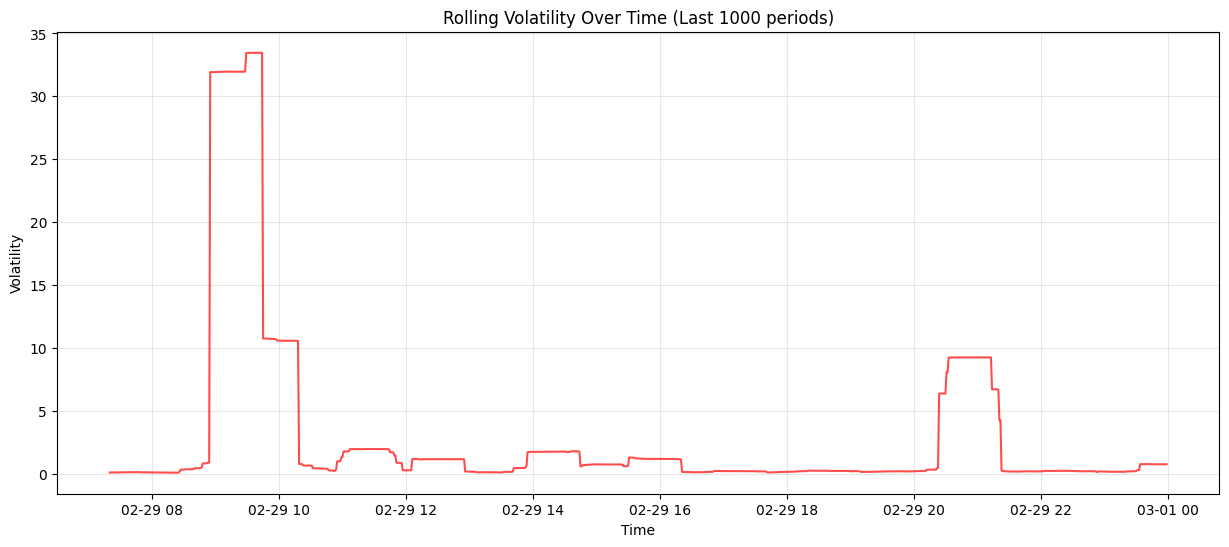

Market regime detection complete!


In [11]:
# regime analysis & visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Plot regime distribution over time
plt.figure(figsize=(15, 8))

# Create a time series plot of regimes
regime_numeric = regime.map({'UP': 1, 'DOWN': -1, 'STABLE': 0, 'HIGH_VOL': 2})
plt.plot(regime_numeric.iloc[-1000:], alpha=0.7, linewidth=1)
plt.title('Market Regime Over Time (Last 1000 periods)')
plt.ylabel('Regime')
plt.xlabel('Time')
plt.yticks([-1, 0, 1, 2], ['DOWN', 'STABLE', 'UP', 'HIGH_VOL'])
plt.grid(True, alpha=0.3)
plt.show()

# Plot volatility over time
plt.figure(figsize=(15, 6))
plt.plot(rolling_vol.iloc[-1000:], alpha=0.7, color='red')
plt.title('Rolling Volatility Over Time (Last 1000 periods)')
plt.ylabel('Volatility')
plt.xlabel('Time')
plt.grid(True, alpha=0.3)
plt.show()

print("Market regime detection complete!")

In [12]:
## regime detection too sensitive?

# Check volatility statistics
print("Volatility statistics:")
print(f"Mean volatility: {rolling_vol.mean():.6f}")
print(f"Std volatility: {rolling_vol.std():.6f}")
print(f"Max volatility: {rolling_vol.max():.6f}")
print(f"Min volatility: {rolling_vol.min():.6f}")

# Check the threshold used
vol_threshold = 0.02  # 2% threshold
print(f"\nVolatility threshold: {vol_threshold}")
print(f"High vol threshold: {vol_threshold * 2}")

# Check how many periods exceed the threshold
high_vol_count = (rolling_vol > vol_threshold * 2).sum()
print(f"Periods above high vol threshold: {high_vol_count}")
print(f"Percentage: {high_vol_count / len(rolling_vol) * 100:.2f}%")

Volatility statistics:
Mean volatility: 3.195032
Std volatility: 79.694082
Max volatility: 7745.561659
Min volatility: 0.044515

Volatility threshold: 0.02
High vol threshold: 0.04
Periods above high vol threshold: 525836
Percentage: 99.99%


In [13]:
## check features count again

# Check current dataset shape
print(f"Current dataset shape: {train.shape}")
print(f"Expected features: ~1552")
print(f"Actual features: {train.shape[1]}")

# Check what happened to the previous features
print("\nChecking for HMA features:")
hma_features = [col for col in train.columns if 'hma' in col]
print(f"HMA features found: {len(hma_features)}")

print("\nChecking for regime features:")
regime_features = [col for col in train.columns if any(x in col for x in ['vol_cluster', 'momentum', 'market_', 'regime', 'trend_'])]
print(f"Regime features found: {len(regime_features)}")

Current dataset shape: (525886, 1552)
Expected features: ~1552
Actual features: 1552

Checking for HMA features:
HMA features found: 220

Checking for regime features:
Regime features found: 162


In [18]:
# check

print(f"Current train shape: {train.shape}")
print(f"HMA features: {len([col for col in train.columns if 'hma' in col])}")
print(f"Regime features: {len([col for col in train.columns if any(x in col for x in ['vol_cluster', 'momentum', 'market_', 'regime', 'trend_'])])}")

Current train shape: (525886, 1552)
HMA features: 220
Regime features: 162
